# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"filamss","key":"e937a29b3c4322f2048a5940f5518e17"}'}

In [2]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset
!unzip new-plant-diseases-dataset.zip


Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augment

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [7]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [17]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [18]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [20]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 163s 71ms/step - loss: 1.3531 - accuracy: 0.6036 - val_loss: 0.5474 - val_accuracy: 0.8324
Epoch 2/10
2197/2197 [==============================] - 151s 69ms/step - loss: 0.4512 - accuracy: 0.8572 - val_loss: 0.2691 - val_accuracy: 0.9112
Epoch 3/10
2197/2197 [==============================] - 152s 69ms/step - loss: 0.2817 - accuracy: 0.9096 - val_loss: 0.1943 - val_accuracy: 0.9376
Epoch 4/10
2197/2197 [==============================] - 152s 69ms/step - loss: 0.1876 - accuracy: 0.9389 - val_loss: 0.2738 - val_accuracy: 0.9185
Epoch 5/10
2197/2197 [==============================] - 153s 69ms/step - loss: 0.1417 - accuracy: 0.9541 - val_loss: 0.2056 - val_accuracy: 0.9364
Epoch 6/10
2197/2197 [==============================] - 153s 70ms/step - loss: 0.1143 - accuracy: 0.9626 - val_loss: 0.1533 - val_accuracy: 0.9512
Epoch 7/10
2197/2197 [==============================] - 151s 69ms/step - loss: 0.0892 - accuracy: 0.9716 - val_loss: 0

## Evaluating Model

In [21]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 49s 22ms/step - loss: 0.0326 - accuracy: 0.9889
Training accuracy: 0.9888612031936646


In [22]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 12s 22ms/step - loss: 0.1280 - accuracy: 0.9626
Validation accuracy: 0.9625540375709534


### Saving Model

In [47]:
cnn.save('trained_plant_disease_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
training_history.history #Return Dictionary of history

{'loss': [1.3530746698379517,
  0.4512130320072174,
  0.2817005515098572,
  0.18763035535812378,
  0.14166849851608276,
  0.11434821784496307,
  0.0892305076122284,
  0.07352398335933685,
  0.06676626950502396,
  0.05700221285223961],
 'accuracy': [0.603584885597229,
  0.8571591377258301,
  0.9096379280090332,
  0.9389287829399109,
  0.9541218876838684,
  0.9626147150993347,
  0.9715769290924072,
  0.9762572050094604,
  0.978163480758667,
  0.981961727142334],
 'val_loss': [0.5474031567573547,
  0.2690843939781189,
  0.19433903694152832,
  0.2737914025783539,
  0.20563283562660217,
  0.15334883332252502,
  0.1380539983510971,
  0.12405728548765182,
  0.1412155032157898,
  0.12801265716552734],
 'val_accuracy': [0.832403838634491,
  0.9111654758453369,
  0.9376280307769775,
  0.9185067415237427,
  0.936432957649231,
  0.9511722922325134,
  0.9568063020706177,
  0.9618711471557617,
  0.9614728093147278,
  0.9625540375709534]}

In [25]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [26]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

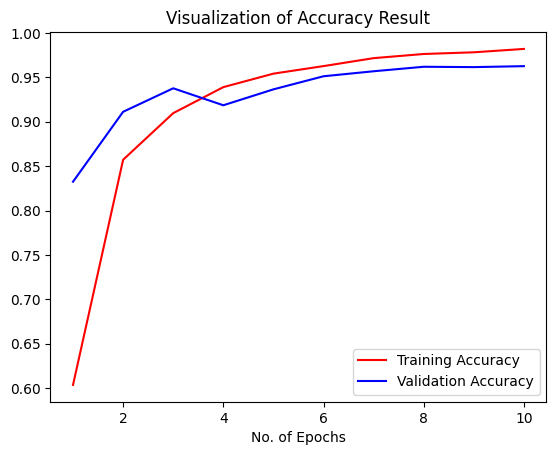

In [27]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [28]:
class_name = validation_set.class_names

In [29]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [30]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 48s 3ms/step


In [31]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [32]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [33]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [35]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.96      0.96       504
                                 Apple___Black_rot       0.98      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.97      0.98      0.98       440
                                   Apple___healthy       0.99      0.95      0.97       502
                               Blueberry___healthy       0.98      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.97      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.95      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.94      0.

### Confusion Matrix Visualization

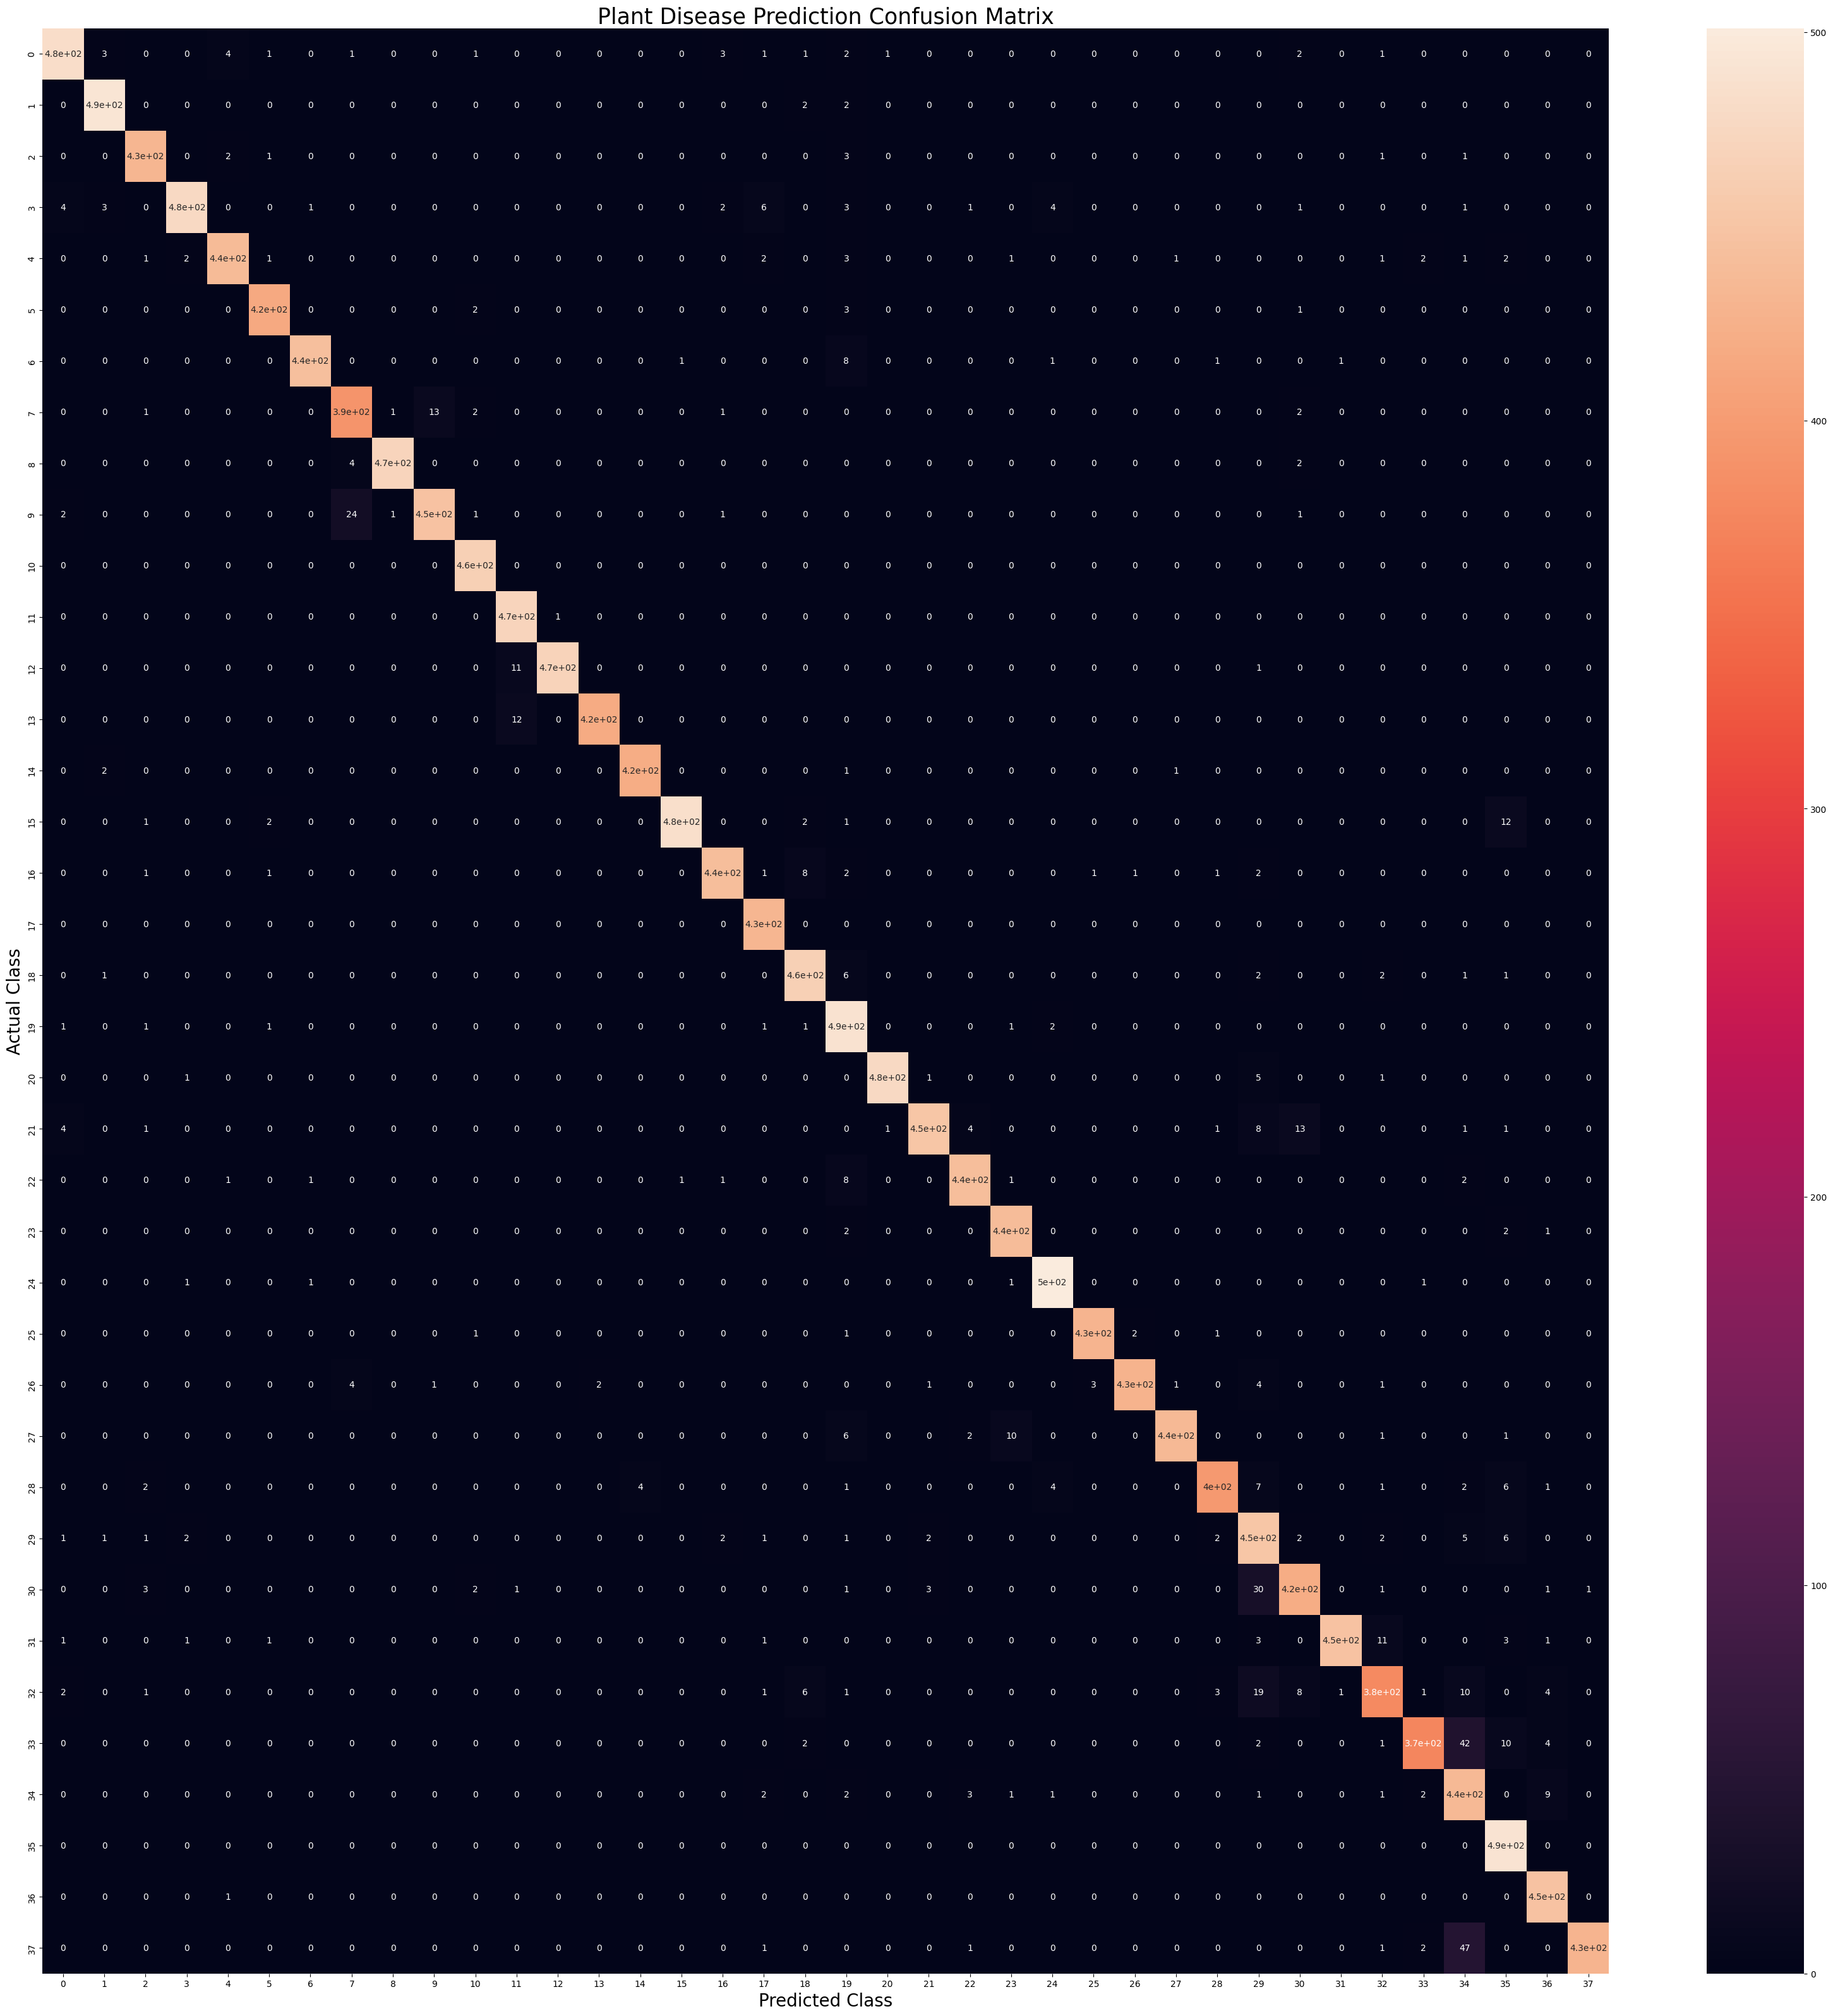

In [36]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

#Testing Model


In [37]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [38]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [49]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.h5')

#Visualising and Performing Prediction on Single image

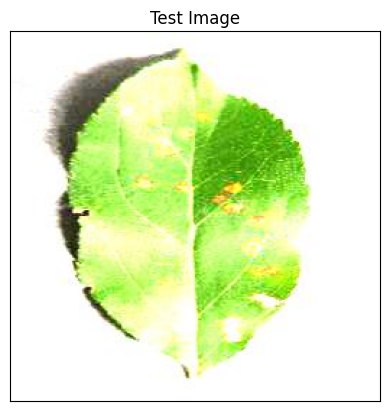

In [50]:
#Test Image Visualization
import cv2
image_path = 'test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [51]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 132ms/step


In [52]:
print(predictions)

[[8.1399779e-13 5.0952016e-12 9.9999988e-01 8.3839506e-16 9.5669419e-12
  1.8115425e-12 5.3437599e-16 4.2733748e-15 6.7534729e-15 4.3418257e-17
  3.9932703e-20 1.4257837e-10 1.0062451e-11 3.2565232e-15 4.0679549e-16
  2.2668362e-13 1.9036144e-12 3.1567208e-12 3.6936157e-12 2.9452675e-12
  4.0023522e-16 4.8362396e-15 4.0423443e-13 5.3952689e-14 3.8090551e-19
  2.4267781e-18 9.3258341e-14 6.1289441e-15 1.6799403e-12 1.4103607e-07
  1.7976876e-09 9.7429226e-14 2.1351039e-13 1.0962382e-15 2.0446122e-11
  7.0380431e-11 4.0630801e-11 1.2150927e-15]]


In [53]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


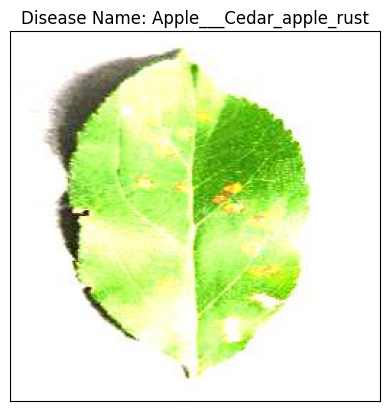

In [54]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()